In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})
pd.set_option("display.max_columns", None)


In [3]:
df = pd.read_csv("../data/data.csv")
df.head()


,user_id,age,monthly_income,account_age_days,gender,default_payment_method,city,total_sessions,num_product_page_visits,num_cart_visits,num_checkout_visits,avg_time_on_product,late_night_session_ratio,device_preference,total_purchases,total_spent,avg_purchase_value,avg_discount_used,impulse_purchase_ratio,past_impulse_purchases,avg_minutes_to_purchase,stress_level,mood_last_week,saving_habit_score,impulse_buy_score
0,1,26,34371.207904,842,Female,UPI,Mumbai,101,36,11,9,56.654508,0.346535,mobile,3.0,8205.970287,2735.323429,13.333333,0.0,0.0,105.333333,5.205191,Sad,3,31.29
1,2,53,15657.516054,985,Male,UPI,Delhi,89,41,9,4,54.156369,0.303371,mobile,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,5.892735,Neutral,5,26.97
2,3,23,29061.244738,556,Female,Card,Bengaluru,93,54,9,10,70.786257,0.193548,mobile,1.0,774.538968,774.538968,50.000000,0.0,0.0,256.000000,4.491991,Neutral,5,28.48
3,4,41,66152.011773,1879,Male,Card,Bengaluru,103,43,6,8,53.231108,0.291262,mobile,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.486099,Neutral,3,18.49
4,5,43,52571.787230,172,Male,UPI,Kolkata,99,40,12,9,58.488991,0.444444,mobile,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6.550978,Anxious,5,26.74


In [4]:
df.columns

Index(['user_id', 'age', 'monthly_income', 'account_age_days', 'gender',
       'default_payment_method', 'city', 'total_sessions',
       'num_product_page_visits', 'num_cart_visits', 'num_checkout_visits',
       'avg_time_on_product', 'late_night_session_ratio', 'device_preference',
       'total_purchases', 'total_spent', 'avg_purchase_value',
       'avg_discount_used', 'impulse_purchase_ratio', 'past_impulse_purchases',
       'avg_minutes_to_purchase', 'stress_level', 'mood_last_week',
       'saving_habit_score', 'impulse_buy_score'],
      dtype='object')

In [5]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   50000 non-null  int64  
 1   age                       50000 non-null  int64  
 2   monthly_income            50000 non-null  float64
 3   account_age_days          50000 non-null  int64  
 4   gender                    50000 non-null  object 
 5   default_payment_method    50000 non-null  object 
 6   city                      50000 non-null  object 
 7   total_sessions            50000 non-null  int64  
 8   num_product_page_visits   50000 non-null  int64  
 9   num_cart_visits           50000 non-null  int64  
 10  num_checkout_visits       50000 non-null  int64  
 11  avg_time_on_product       50000 non-null  float64
 12  late_night_session_ratio  50000 non-null  float64
 13  device_preference         50000 non-null  object 
 14  total_

,count,mean,std,min,25%,50%,75%,max
user_id,50000.0,25000.500000,14433.901067,1.000000,12500.750000,25000.500000,37500.250000,50000.000000
age,50000.0,41.102560,13.532126,18.000000,29.000000,41.000000,53.000000,64.000000
monthly_income,50000.0,46641.715446,28561.393466,10000.000000,30865.214267,38950.982882,50495.570271,232806.188226
account_age_days,50000.0,1018.377320,568.764440,30.000000,527.000000,1018.000000,1513.000000,1999.000000
total_sessions,50000.0,104.136000,9.356522,67.000000,98.000000,104.000000,110.000000,143.000000
num_product_page_visits,50000.0,46.840920,6.571730,21.000000,42.000000,47.000000,51.000000,74.000000
num_cart_visits,50000.0,12.499200,3.500829,1.000000,10.000000,12.000000,15.000000,29.000000
num_checkout_visits,50000.0,8.332900,2.879285,0.000000,6.000000,8.000000,10.000000,24.000000
avg_time_on_product,50000.0,60.159615,5.882337,39.504472,56.101849,59.938756,64.012732,90.137456
late_night_session_ratio,50000.0,0.281939,0.103193,0.049505,0.205882,0.264706,0.342342,0.611111


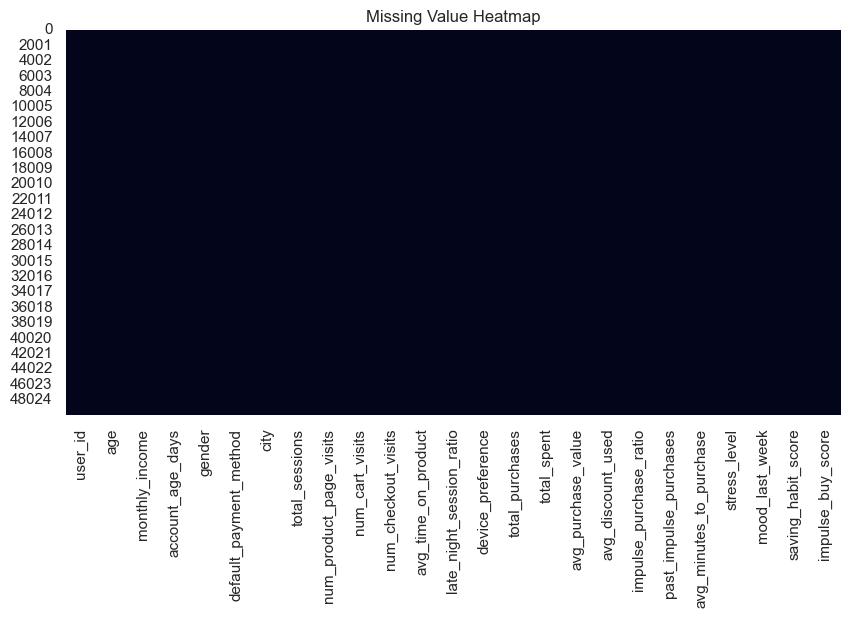

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


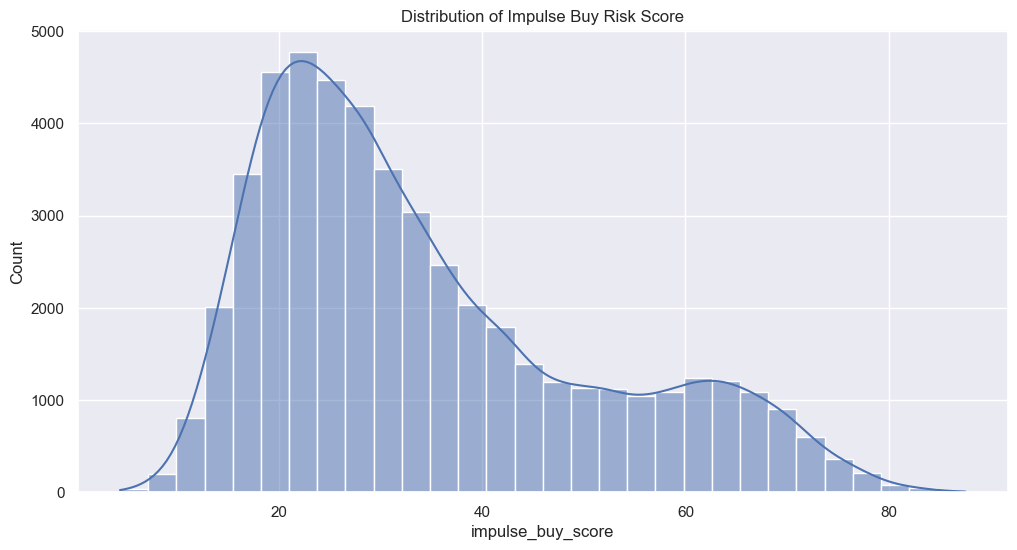

In [7]:
sns.histplot(df["impulse_buy_score"], bins=30, kde=True)
plt.title("Distribution of Impulse Buy Risk Score")
plt.show()


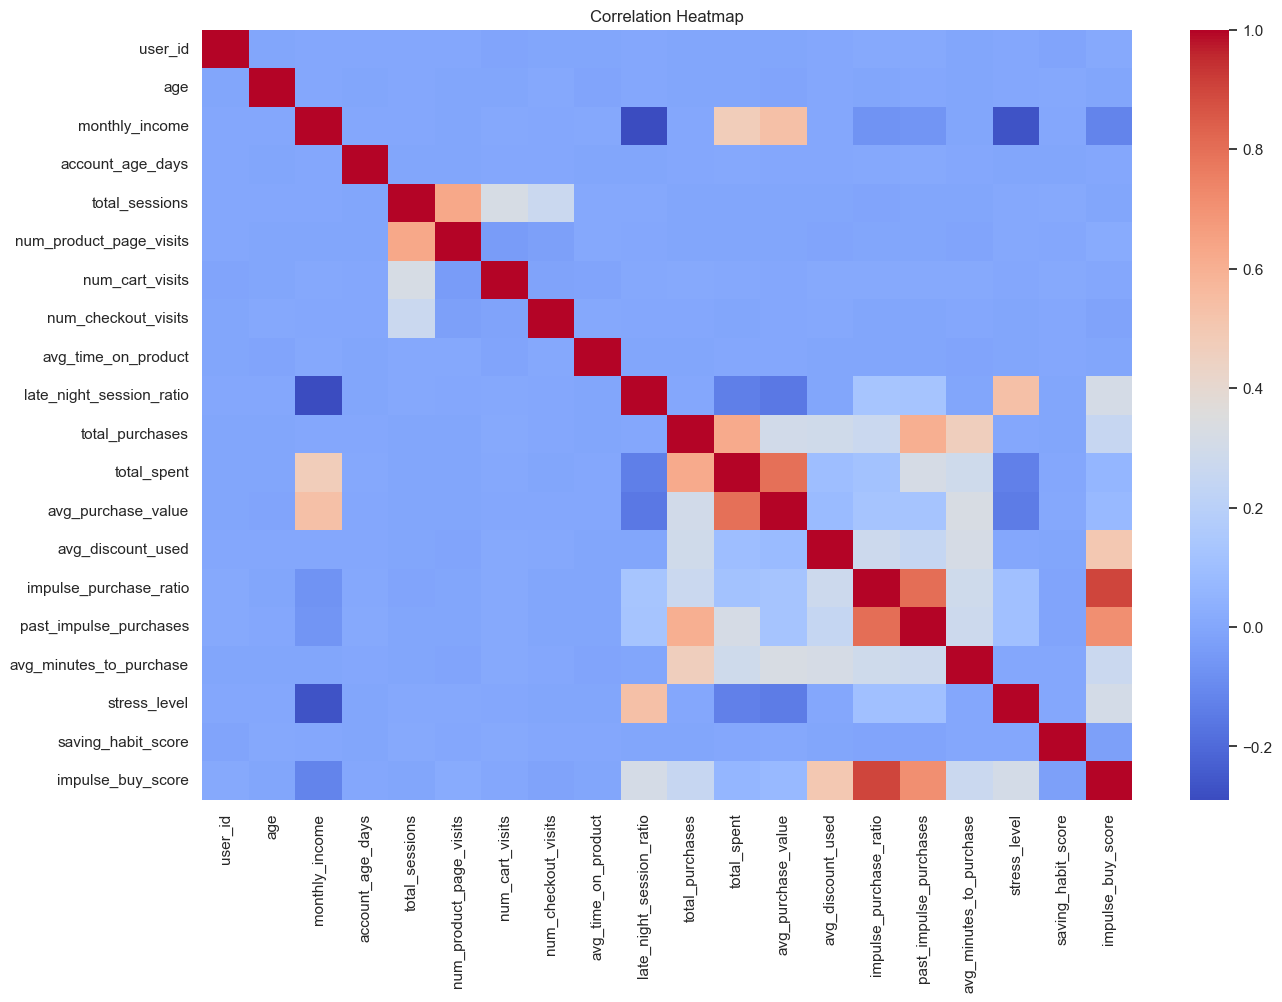

In [8]:
plt.figure(figsize=(15,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [9]:
target_corr = (
    df.corr(numeric_only=True)["impulse_buy_score"]
    .sort_values(ascending=False)
)
target_corr.head(10)


impulse_buy_score           1.000000
impulse_purchase_ratio      0.902819
past_impulse_purchases      0.708138
avg_discount_used           0.497843
late_night_session_ratio    0.311326
stress_level                0.306107
avg_minutes_to_purchase     0.266060
total_purchases             0.250046
avg_purchase_value          0.075589
total_spent                 0.061238
Name: impulse_buy_score, dtype: float64

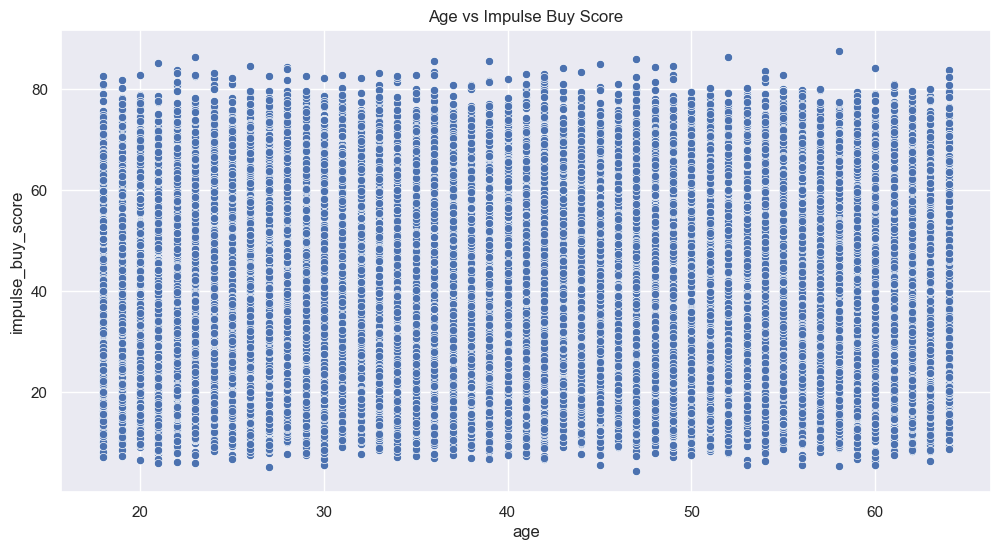

In [10]:
sns.scatterplot(x=df["age"], y=df["impulse_buy_score"])
plt.title("Age vs Impulse Buy Score")
plt.show()


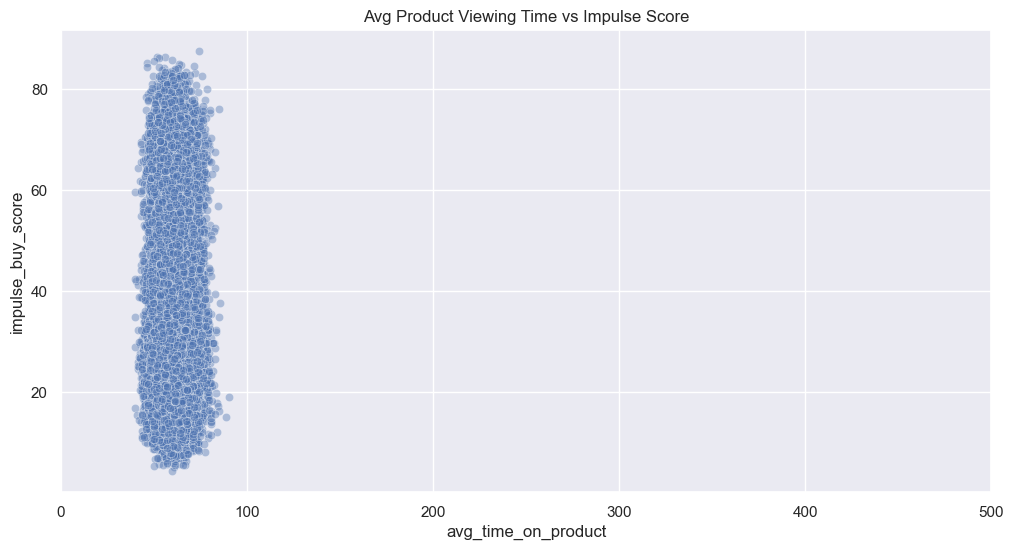

In [11]:
sns.scatterplot(
    x=df["avg_time_on_product"],
    y=df["impulse_buy_score"],
    alpha=0.4
)
plt.xlim(0, 500)
plt.title("Avg Product Viewing Time vs Impulse Score")
plt.show()


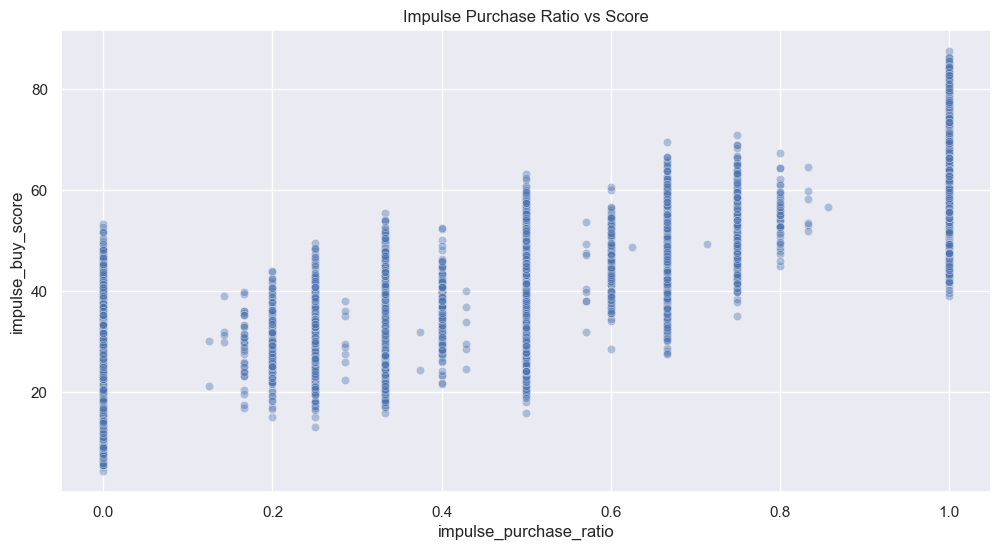

In [12]:
sns.scatterplot(
    x=df["impulse_purchase_ratio"],
    y=df["impulse_buy_score"],
    alpha=0.4
)
plt.title("Impulse Purchase Ratio vs Score")
plt.show()


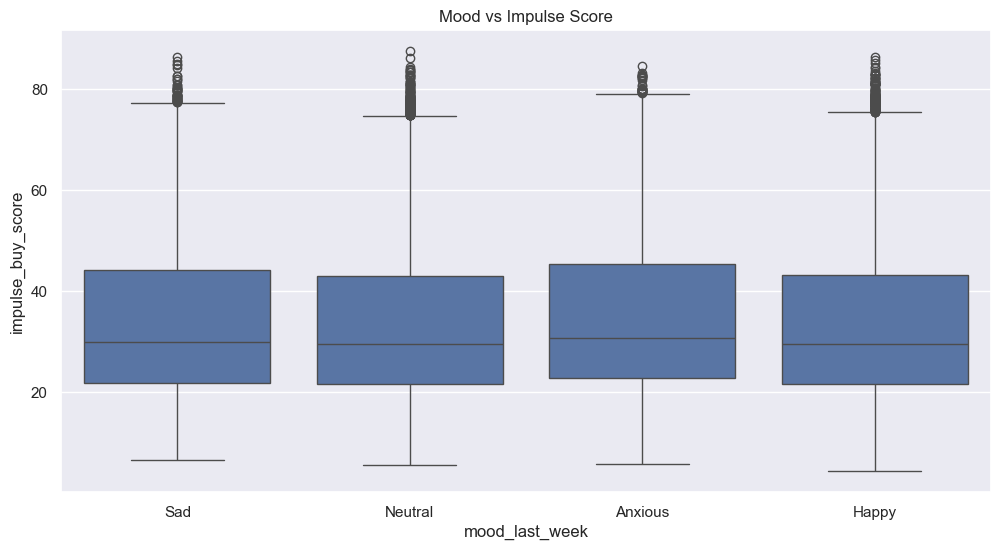

In [13]:
sns.boxplot(x=df["mood_last_week"], y=df["impulse_buy_score"])
plt.title("Mood vs Impulse Score")
plt.show()


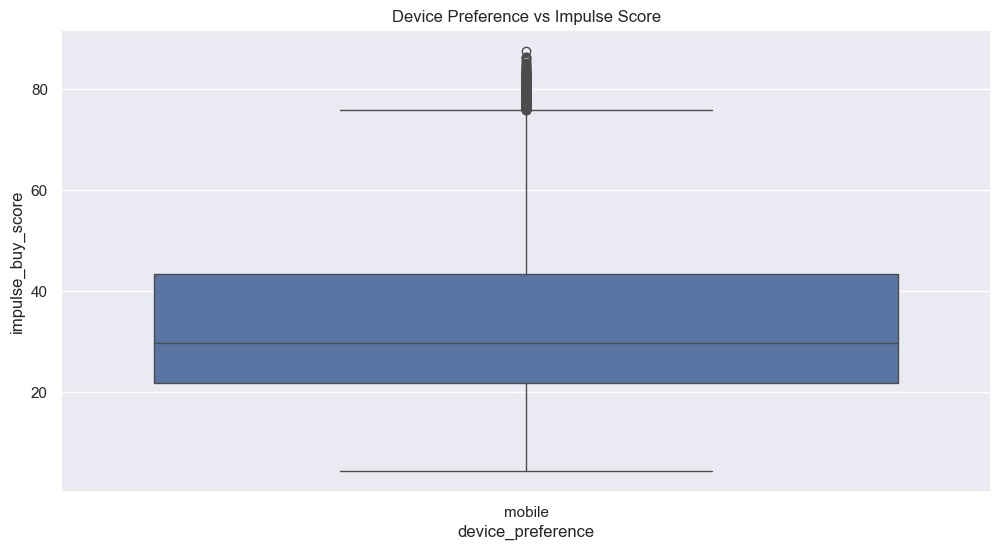

In [14]:
sns.boxplot(x=df["device_preference"], y=df["impulse_buy_score"])
plt.title("Device Preference vs Impulse Score")
plt.show()


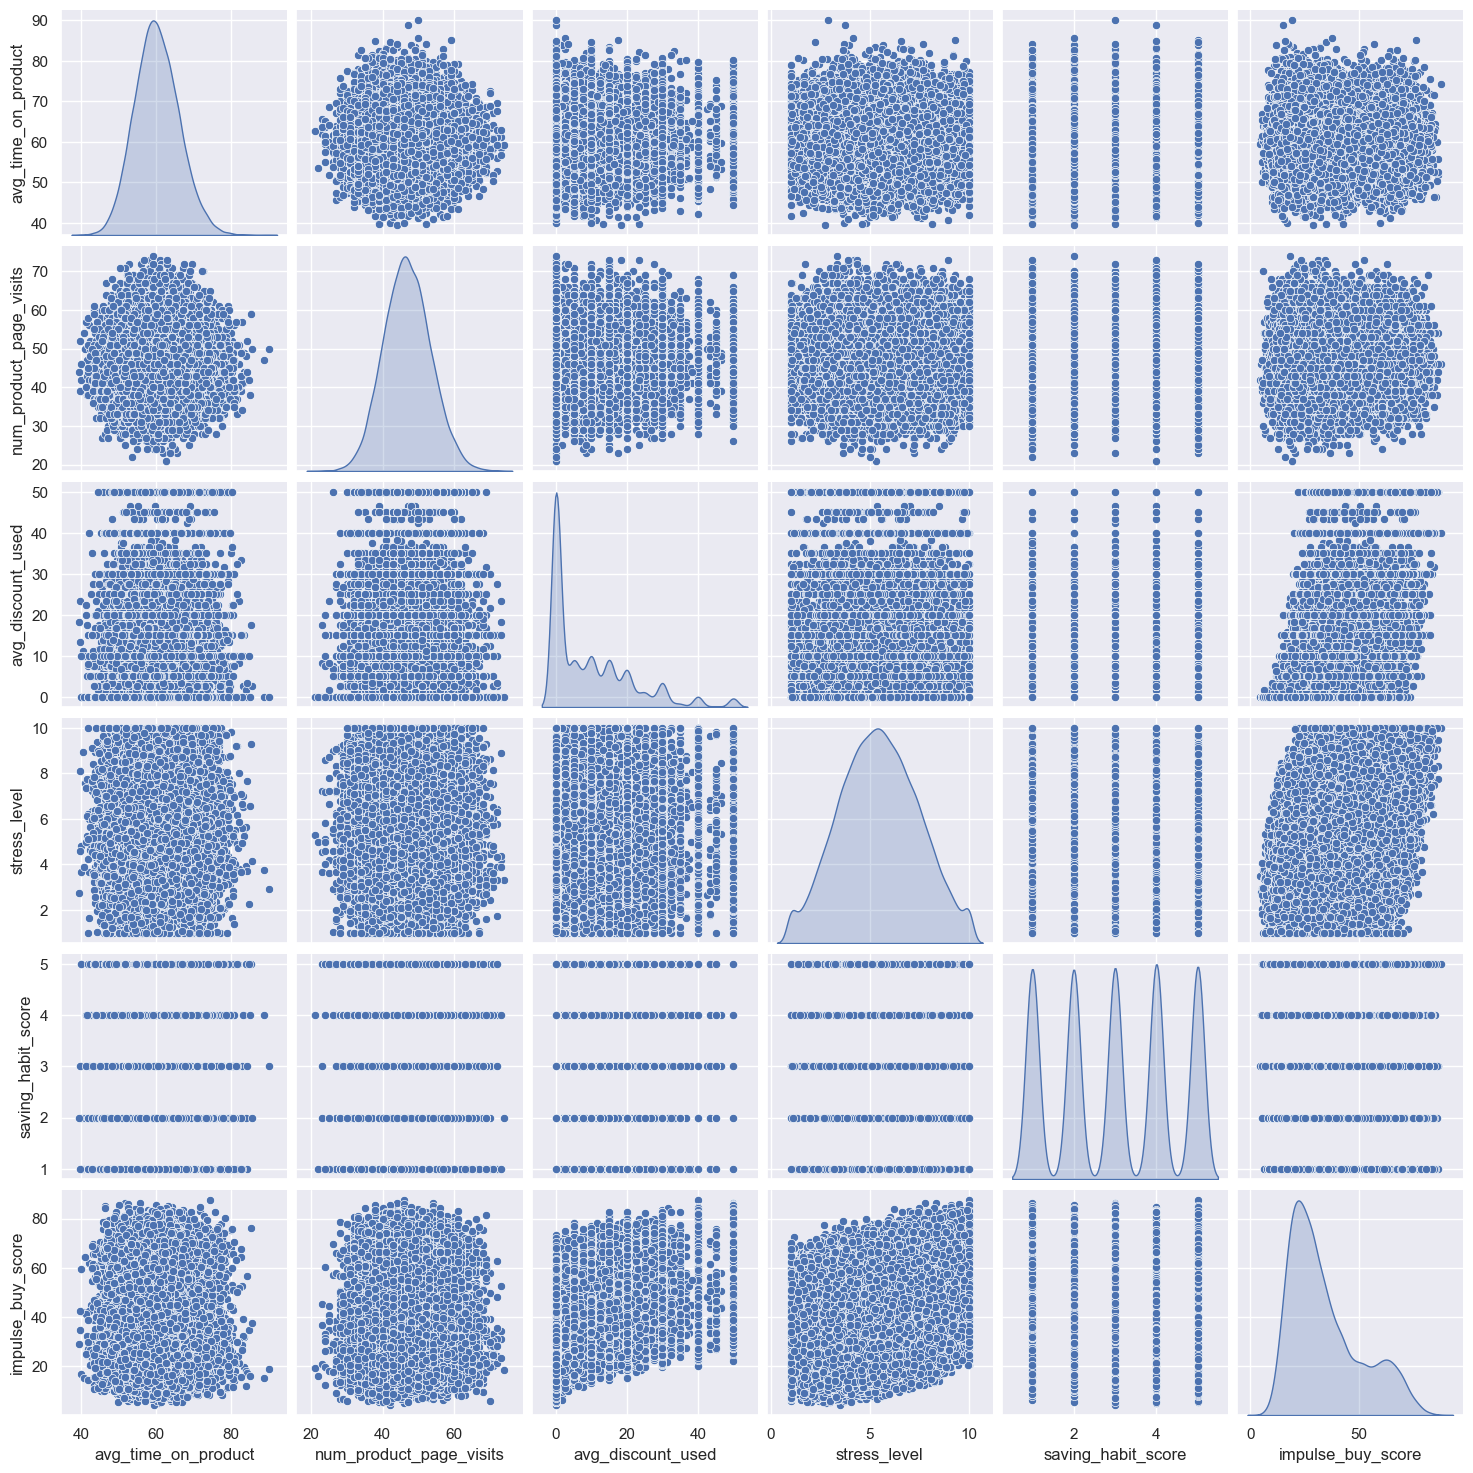

In [15]:
sns.pairplot(df[[
    "avg_time_on_product",
    "num_product_page_visits",
    "avg_discount_used",
    "stress_level",
    "saving_habit_score",
    "impulse_buy_score"
]], diag_kind="kde")
plt.show()


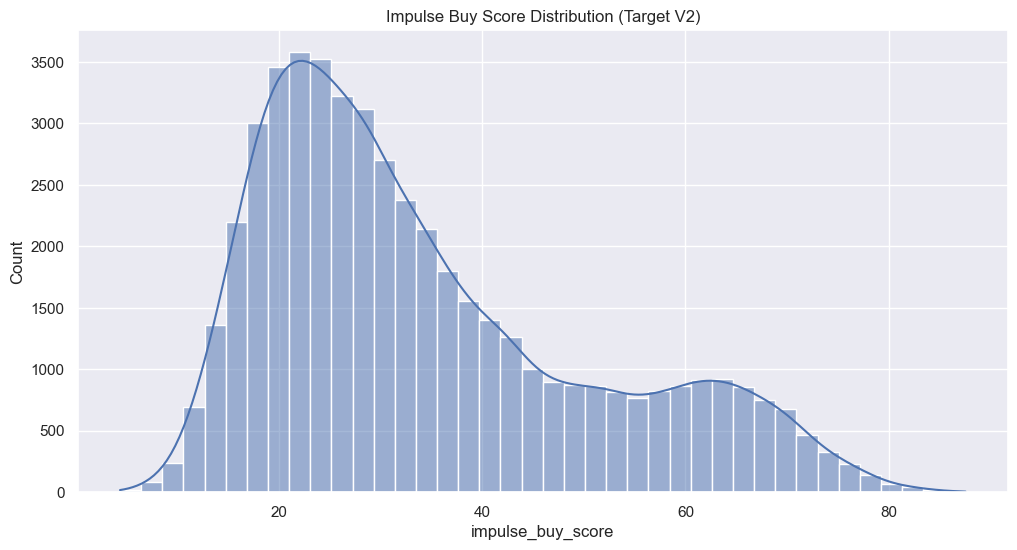

In [16]:
sns.histplot(df["impulse_buy_score"], bins=40, kde=True)
plt.title("Impulse Buy Score Distribution (Target V2)")
plt.show()


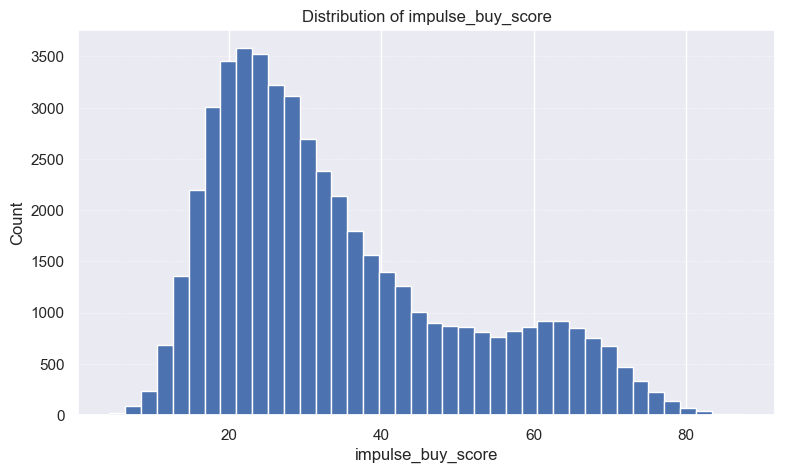

In [17]:
# Cell 3: histogram of the target (impulse_buy_score)
target = "impulse_buy_score"
if target not in df.columns:
    target = [c for c in df.columns if "impulse" in c.lower()]
    target = target[0] if target else None

if target:
    plt.figure(figsize=(9,5))
    plt.hist(df[target].dropna(), bins=40)
    plt.title(f"Distribution of {target}")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle=":", linewidth=0.5)
    plt.show()
else:
    print("No target column found (no column with 'impulse' in name).")


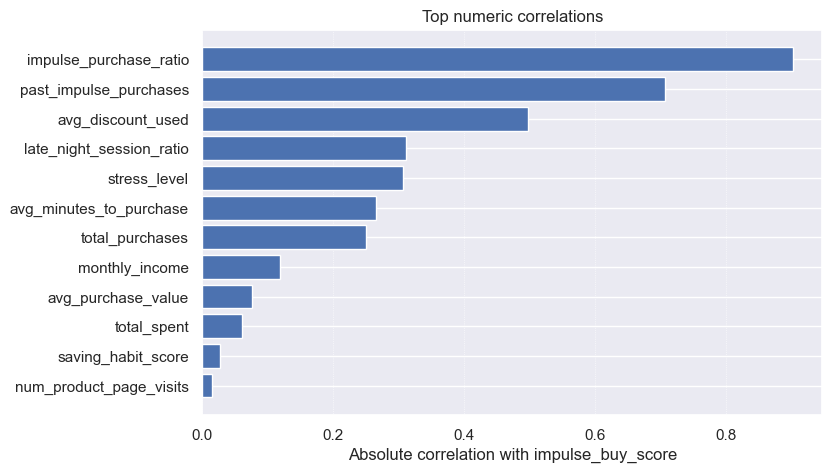

In [18]:
# Cell 4: top numeric correlations with target
if target:
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric) > 1:
        corr = df[numeric].corr()[target].abs().sort_values(ascending=False)
        corr = corr.drop(target, errors="ignore").head(12)
        plt.figure(figsize=(8,5))
        plt.barh(corr.index[::-1], corr.values[::-1])
        plt.xlabel("Absolute correlation with " + target)
        plt.title("Top numeric correlations")
        plt.grid(axis="x", linestyle=":", linewidth=0.5)
        plt.show()
    else:
        print("Not enough numeric columns for correlation.")
else:
    print("No target defined.")


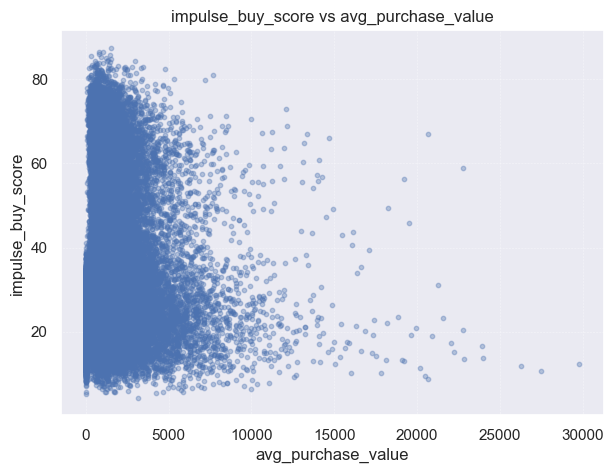

In [19]:
# Cell 5: scatter target vs avg_purchase_value
xcol = "avg_purchase_value"
if xcol in df.columns and target:
    plt.figure(figsize=(7,5))
    plt.scatter(df[xcol], df[target], alpha=0.35, s=10)
    plt.xlabel(xcol)
    plt.ylabel(target)
    plt.title(f"{target} vs {xcol}")
    plt.grid(True, linestyle=":", linewidth=0.4)
    plt.show()
else:
    print(f"Column {xcol} not found or target missing.")


C:\Users\Pegasus\AppData\Local\Temp\ipykernel_17120\300307586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


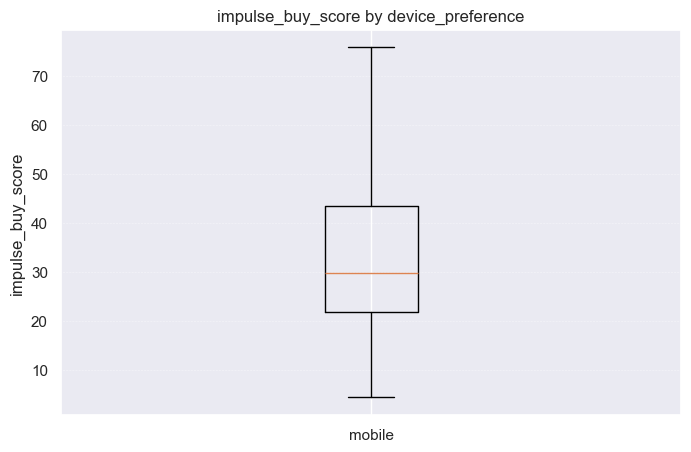

In [20]:
# Cell 6: boxplot of target grouped by device_preference
group_col = "device_preference"
if group_col in df.columns and target:
    groups = df.groupby(group_col)[target].apply(list)
    labels = groups.index.tolist()
    data = [groups[l] for l in labels]
    plt.figure(figsize=(8,5))
    plt.boxplot(data, labels=labels, showfliers=False)
    plt.ylabel(target)
    plt.title(f"{target} by {group_col}")
    plt.grid(axis="y", linestyle=":", linewidth=0.4)
    plt.show()
else:
    print(f"Column {group_col} not found or target missing.")
